# 07 Pandas et séries temporelles

## 1. Travailler avec des séries Temporelles - ici df = dataframe = nommé bitcoin

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
bitcoin = pd.read_csv('data/BTC-EUR.csv') # on charge le dataframe
bitcoin.head(10) # on visualise les entêtes -> on voit les index de la dataframe de 0, 1, 2 etc...
# bitcoin = bitcoin.set_index('Date')   #  change l'index frame de bitcoin par sa time series MAIS APPORTE PB DE RESAMPLE ET AUTRES LECTURES DE TIMES-INDEX

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-10-04,3.700,3.821,3.746,3.750,3.750,1357
1,2011-10-05,3.750,3.820,3.650,3.676,3.676,3349
2,2011-10-06,3.676,3.743,3.450,3.550,3.550,6642
3,2011-10-07,3.550,3.590,2.900,3.293,3.293,7135
4,2011-10-08,3.293,3.283,2.872,2.890,2.890,2007
5,2011-10-09,2.890,3.180,2.978,2.978,2.978,901
6,2011-10-10,2.978,3.200,3.000,3.090,3.090,1376
7,2011-10-11,3.090,3.091,2.881,2.929,2.929,4519
8,2011-10-12,2.929,3.190,2.910,3.060,3.060,4023
9,2011-10-13,3.060,3.100,2.960,2.960,2.960,4647


In [5]:
type(bitcoin)


pandas.core.frame.DataFrame

In [6]:
print(bitcoin.index)  # -> affiche le tableau des index_dataframe = RangeIndex(start=0, stop=2923, step=1)
print(bitcoin.shape)

RangeIndex(start=0, stop=2923, step=1)
(2923, 7)


In [7]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2923 entries, 0 to 2922
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2923 non-null   object 
 1   Open       2923 non-null   float64
 2   High       2923 non-null   float64
 3   Low        2923 non-null   float64
 4   Close      2923 non-null   float64
 5   Adj Close  2923 non-null   float64
 6   Volume     2923 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 160.0+ KB


In [8]:
bitcoin.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2.923000e+03
mean,1989.933793,2052.332373,1921.136068,1992.525601,1992.525601,3.310173e+07
std,3007.007836,3112.005967,2881.927756,3008.582222,3008.582222,2.351084e+08
min,1.521000,1.649000,1.500000,1.521000,1.521000,1.470000e+02
25%,107.805001,111.944999,102.465000,108.400002,108.400002,2.756760e+05
50%,399.570007,405.850006,392.000000,399.809998,399.809998,2.049012e+06
75%,3202.104980,3285.430054,3140.775024,3207.844971,3207.844971,3.326155e+07
max,16374.540039,16670.939453,15760.450195,16376.299805,16376.299805,1.221204e+10


In [9]:
bitcoin = pd.read_csv('data/BTC-EUR.csv', index_col='Date', parse_dates=True)   # on charge le dataframe ET on met en index_df les dates, parser = format datetime!
bitcoin.info()   # on regarde un aperçu du tableau avec en-têtes
# bitcoin.index   # ou bien ON REGARDE LE CHANGEMENT DES INDEXS

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2923 entries, 2011-10-04 to 2019-10-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2923 non-null   float64
 1   High       2923 non-null   float64
 2   Low        2923 non-null   float64
 3   Close      2923 non-null   float64
 4   Adj Close  2923 non-null   float64
 5   Volume     2923 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 159.9 KB


In [10]:
bitcoin.sample(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-13,1148.069946,1165.510010,1128.750000,1157.069946,1157.069946,17583296
2013-04-30,109.000000,112.000000,104.050003,105.550003,105.550003,470748
2019-05-27,7798.850098,7974.470215,7753.950195,7848.660156,7848.660156,111416862
2016-12-27,863.070007,900.260010,856.559998,888.460022,888.460022,8986017
2011-10-20,1.620000,1.772000,1.597000,1.740000,1.740000,11524
2013-03-20,46.000000,51.410000,44.540001,49.820000,49.820000,370566
2015-04-20,208.089996,211.539993,206.360001,208.809998,208.809998,702603
2016-05-14,403.420013,404.989990,399.859985,403.339996,403.339996,1723550
2015-03-16,273.100006,279.850006,272.260010,275.269989,275.269989,725528


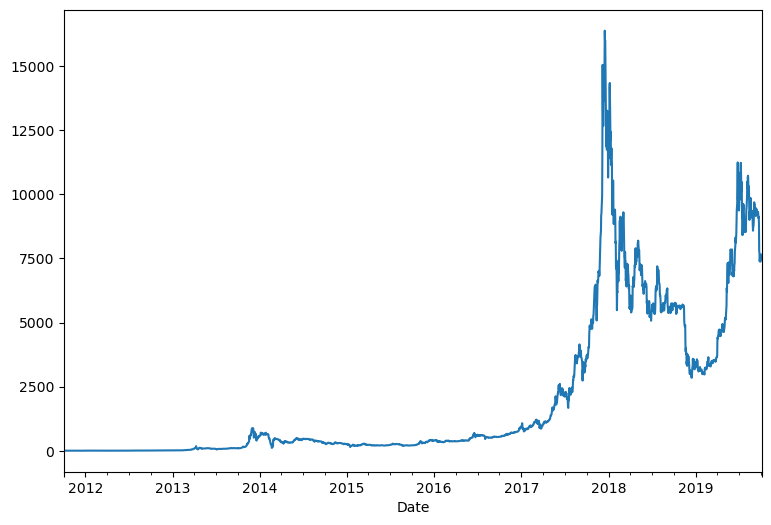

In [11]:
bitcoin['Close'].plot(figsize=(9, 6))  # on affiche un courbe plot pour la colonne 'close'
plt.show()

In [12]:
bitcoin.index

DatetimeIndex(['2011-10-04', '2011-10-05', '2011-10-06', '2011-10-07',
               '2011-10-08', '2011-10-09', '2011-10-10', '2011-10-11',
               '2011-10-12', '2011-10-13',
               ...
               '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28',
               '2019-09-29', '2019-09-30', '2019-10-01', '2019-10-02',
               '2019-10-03', '2019-10-04'],
              dtype='datetime64[ns]', name='Date', length=2923, freq=None)

<Axes: xlabel='Date'>

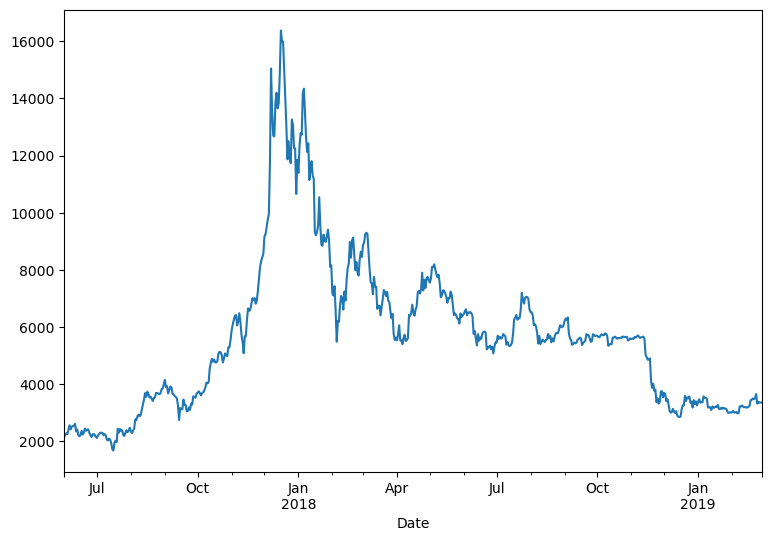

In [13]:
bitcoin.loc['2017-06':'2019-02','Close'].plot(figsize=(9,6))

## infos sur les différences de sélection de cellules pandas : loc - iloc - at - sx() - query()
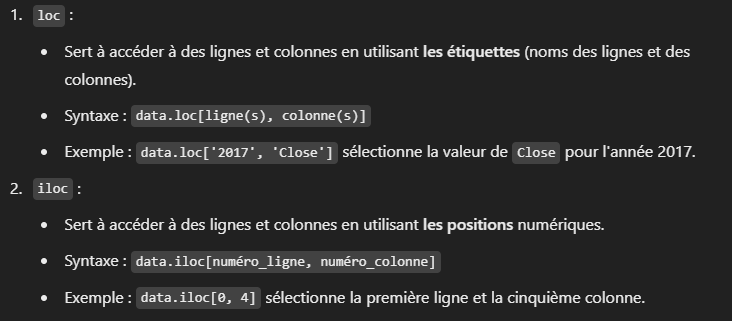

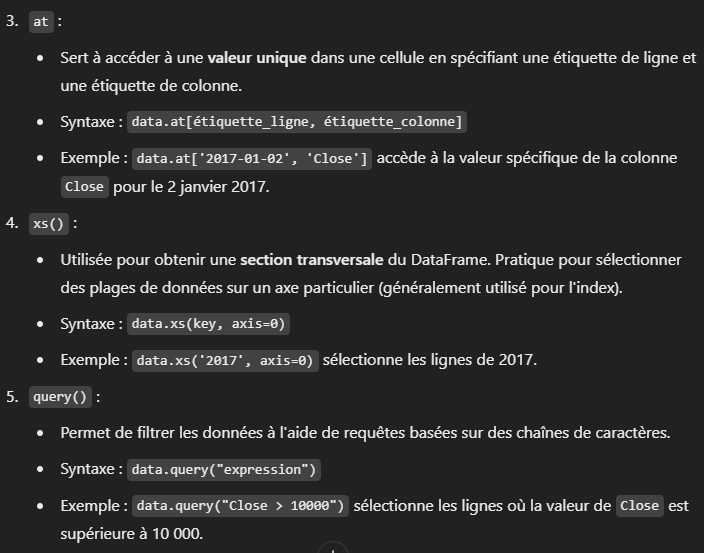

## 2. Resample : regrouper des données selon une fréquence temporelle
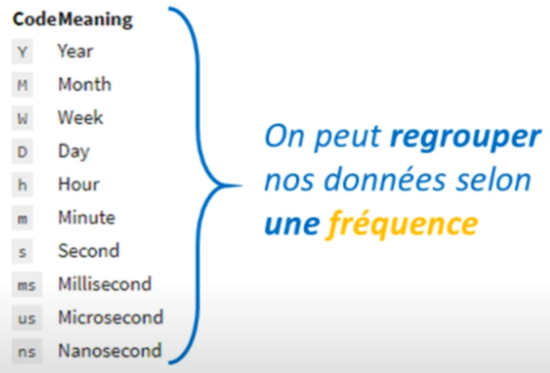

In [17]:
bitcoin.loc['2019']['Close']

Date
2019-01-01    3372.090088
2019-01-02    3468.399902
2019-01-03    3345.330078
2019-01-04    3370.939941
2019-01-05    3359.159912
                 ...     
2019-09-30    7626.029785
2019-10-01    7625.560059
2019-10-02    7655.250000
2019-10-03    7516.790039
2019-10-04    7487.083496
Name: Close, Length: 277, dtype: float64

In [18]:
type(bitcoin.loc['2019':'2020', 'Close'])

pandas.core.series.Series

C:\Users\user\AppData\Local\Temp\ipykernel_25188\2166154103.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bitcoin.loc['2019':'2020', 'Close'].resample('M').mean().plot()


"\nl'objet renvoyé par resample() ne peut pas être directement tracé. \nIl faut d'abord appliquer une fonction d'agrégation (comme mean(), sum(), etc.) avant de tracer les données.\n"

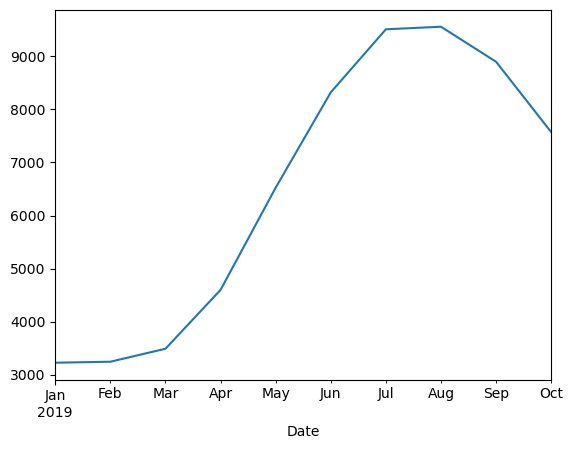

In [19]:
bitcoin.loc['2019':'2020', 'Close'].resample('M').mean().plot()
"""
l'objet renvoyé par resample() ne peut pas être directement tracé. 
Il faut d'abord appliquer une fonction d'agrégation (comme mean(), sum(), etc.) avant de tracer les données.
"""


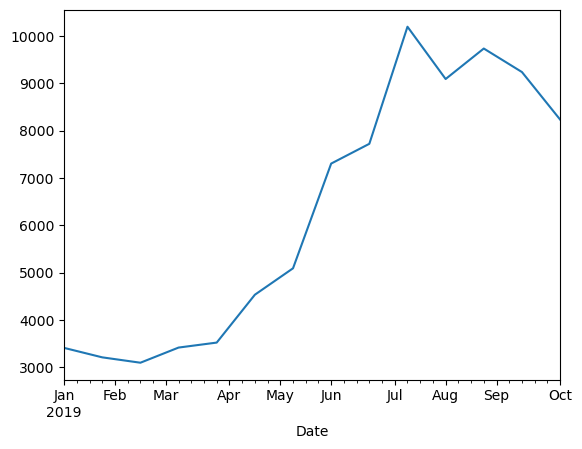

In [20]:
bitcoin.loc['2019', 'Close'].resample('3W').mean().plot()
plt.show()

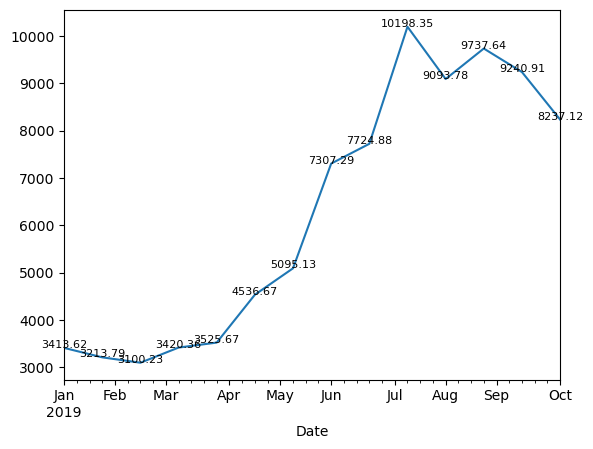

In [21]:
moyennes = bitcoin.loc['2019', 'Close'].resample('3W').mean()

moyennes.plot()
# Afficher les valeurs des points
for x, y in zip(moyennes.index, moyennes.values):
    plt.text(x, y, f'{y:.2f}', fontsize=8, ha='center')

plt.show()

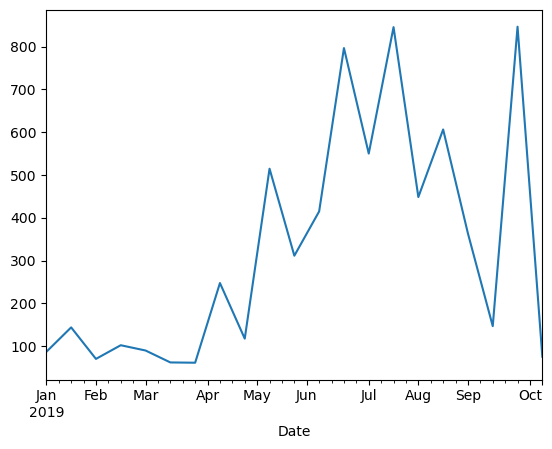

In [22]:
bitcoin.loc['2019', 'Close'].resample('2W').std().plot()
plt.show()

In [23]:
bitcoin.loc['2019', 'Close'].resample('3W').mean()

Date
2019-01-06     3413.619995
2019-01-27     3213.792364
2019-02-17     3100.226214
2019-03-10     3420.364304
2019-03-31     3525.670991
2019-04-21     4536.665748
2019-05-12     5095.126232
2019-06-02     7307.294782
2019-06-23     7724.881836
2019-07-14    10198.354678
2019-08-04     9093.784273
2019-08-25     9737.637137
2019-09-15     9240.907692
2019-10-06     8237.117547
Freq: 3W-SUN, Name: Close, dtype: float64

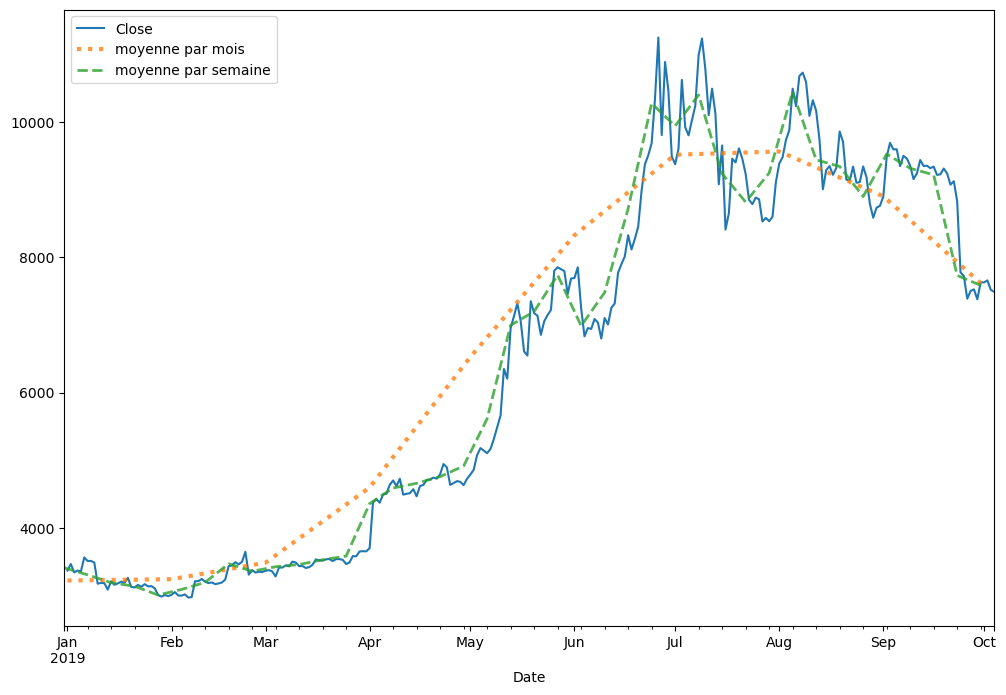

In [24]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019', 'Close'].plot()
bitcoin.loc['2019', 'Close'].resample('ME').mean().plot(label='moyenne par mois', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019', 'Close'].resample('W').mean().plot(label='moyenne par semaine', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

# PS : utiliser std() au lieu de mean() donera la volatilité du BTC par exemple

## 3. Aggregate : rassembler dans un meme tableau plusieurs fonctions étudiées (mean, std etc.)

<Axes: xlabel='Date'>

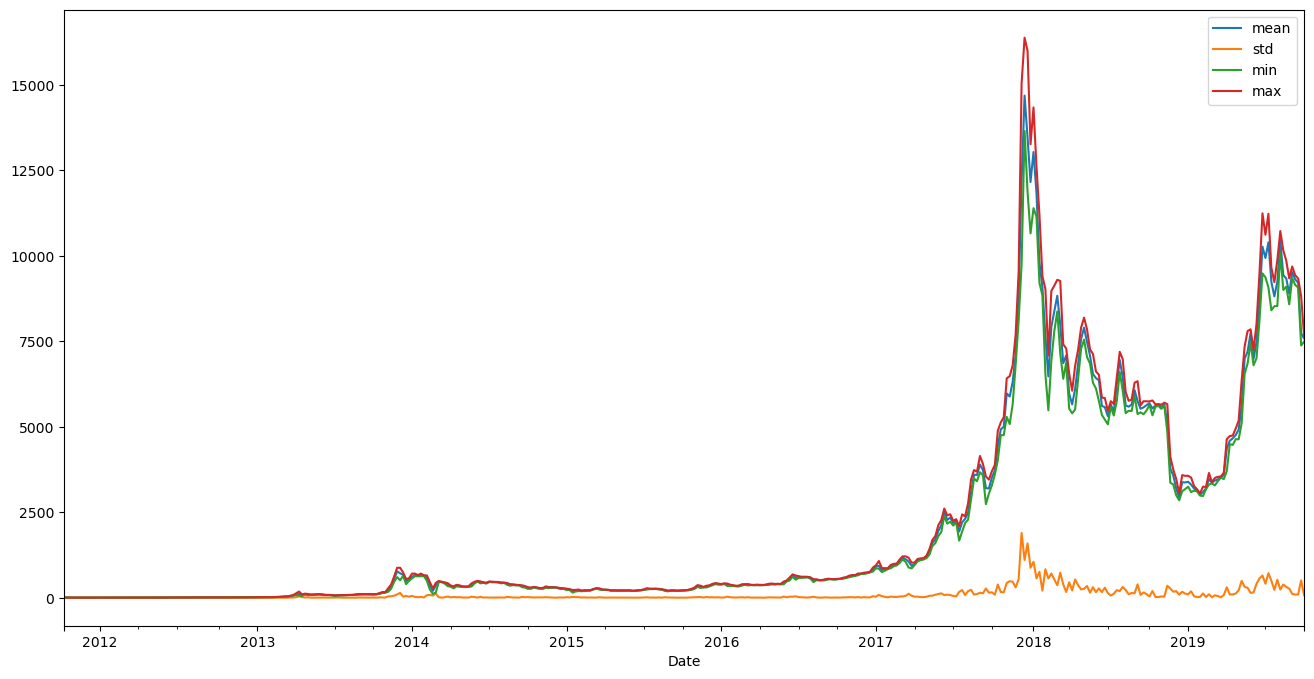

In [26]:
bitcoin['Close'].resample('W').agg(['mean', 'std', 'min', 'max']).plot(figsize=(16, 8))

In [27]:
m = bitcoin['Close'].resample('W').agg(['mean', 'std', 'min', 'max'])
# type(m)
m.head()

,mean,std,min,max
Date,,,,
2011-10-09,3.356167,0.363120,2.890,3.750
2011-10-16,2.908000,0.177088,2.587,3.090
2011-10-23,1.910714,0.258091,1.620,2.274
2011-10-30,2.174000,0.244941,1.872,2.574
2011-11-06,2.281000,0.087130,2.170,2.420


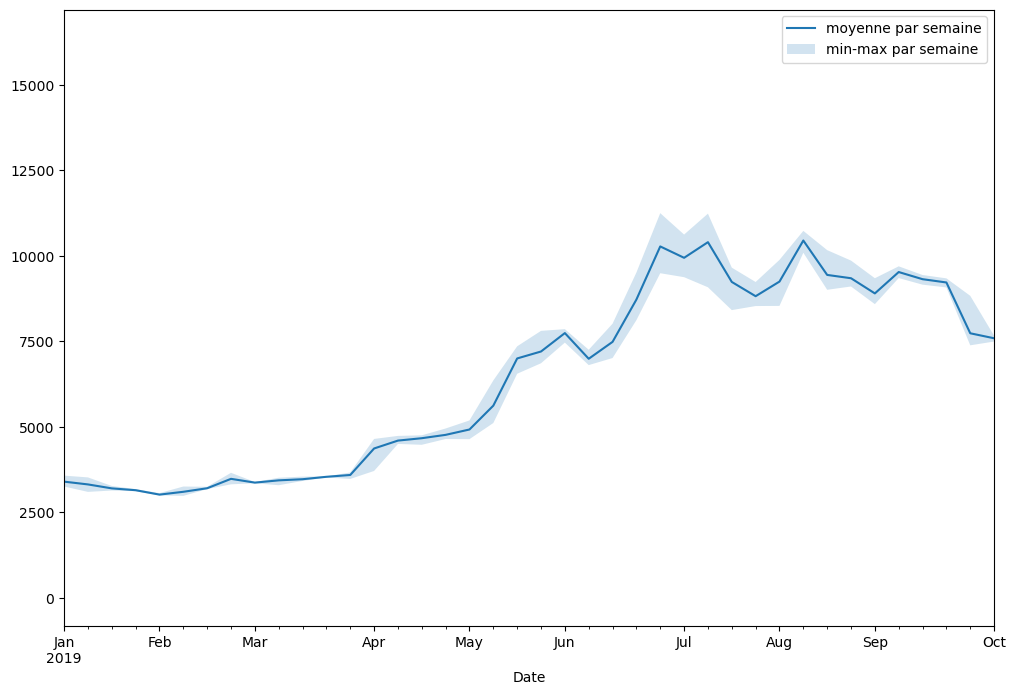

In [28]:
m = bitcoin['Close'].resample('W').agg(['mean', 'std', 'min', 'max'])

plt.figure(figsize=(12, 8))
m['mean']['2019'].plot(label='moyenne par semaine')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='min-max par semaine')

plt.legend()
plt.show()

<Axes: xlabel='Date'>

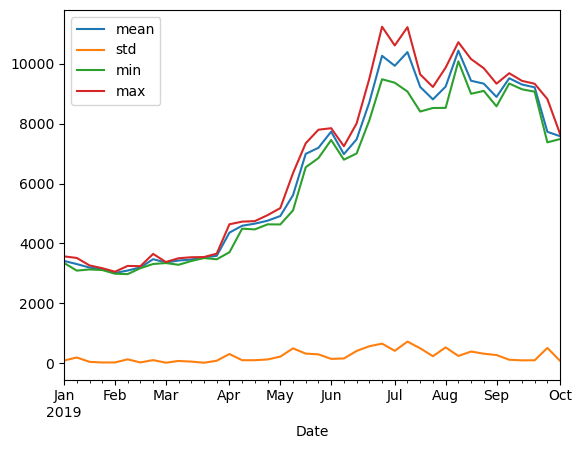

In [29]:
bitcoin.loc['2019', 'Close'].resample('W').agg(['mean', 'std', 'min', 'max']).plot()

## 4. Moving Average et EWM
### moyenne mobile sur une fenetre et moyenne mobile exponentiellement pondérée
- Pour le moving average :
au lieu de faire une moyenne sur 1 semaine (W) de semaine en semaine, on veut faire rouler cette moyenne, c'est à dire que, pour chaque jour, on prend les 7 jours précédents (y compris le jour en question) et on calcule la moyenne des prix de clôture sur cette période de 7 jours.

- Pour l'EWMA :
Ici, les observations les plus récentes ont plus de poids que les observations plus anciennes.

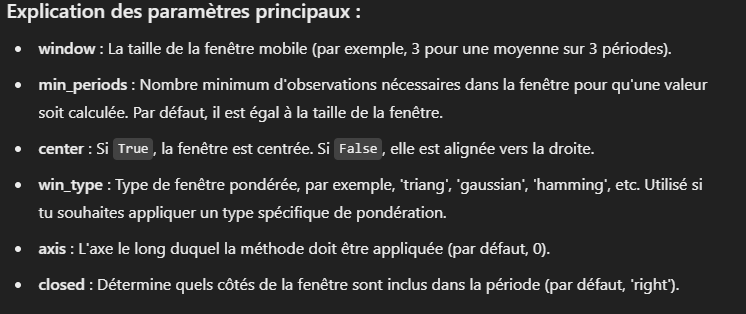

In [32]:
bitcoin.loc['2019-09', 'Close']

Date
2019-09-01    8891.830078
2019-09-02    9476.099609
2019-09-03    9685.990234
2019-09-04    9588.730469
2019-09-05    9590.730469
2019-09-06    9342.450195
2019-09-07    9493.339844
2019-09-08    9455.110352
2019-09-09    9347.929688
2019-09-10    9149.929688
2019-09-11    9234.129883
2019-09-12    9432.070313
2019-09-13    9344.730469
2019-09-14    9347.790039
2019-09-15    9311.919922
2019-09-16    9334.099609
2019-09-17    9212.389648
2019-09-18    9221.169922
2019-09-19    9306.330078
2019-09-20    9235.250000
2019-09-21    9068.450195
2019-09-22    9119.110352
2019-09-23    8823.660156
2019-09-24    7774.080078
2019-09-25    7717.430176
2019-09-26    7384.330078
2019-09-27    7499.259766
2019-09-28    7523.009766
2019-09-29    7375.950195
2019-09-30    7626.029785
Name: Close, dtype: float64

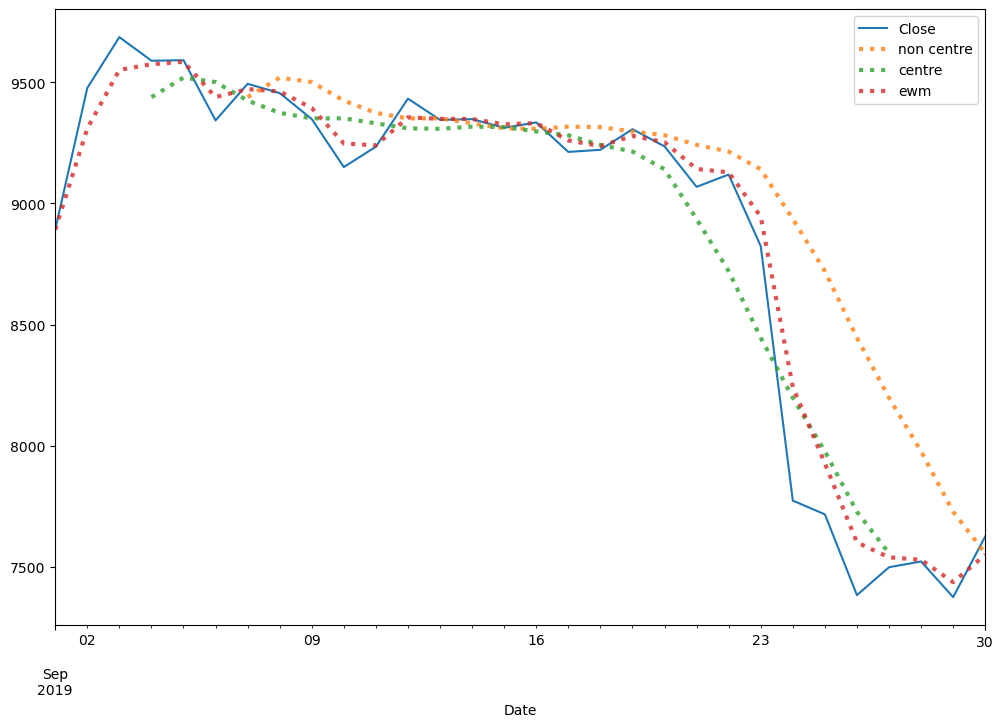

In [33]:
# ajouter + tracer 1 à 1 chaque figure ici pour bien comprendre le pb de décalage du MA et solution EWM
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window=7).mean().plot(label='non centre', lw=3, ls=':', alpha=0.8) # pb de décalage car moyen mise à la fin de période
bitcoin.loc['2019-09', 'Close'].rolling(window=7, center=True).mean().plot(label='centre', lw=3, ls=':', alpha=0.8) # mieux car centré mais décalé encore
bitcoin.loc['2019-09', 'Close'].ewm(alpha=0.6).mean().plot(label='ewm', lw=3, ls=':', alpha=0.8) # le mieux ici pour ce type de datas car plus proche de l'original
plt.legend()
plt.show()

### EWM
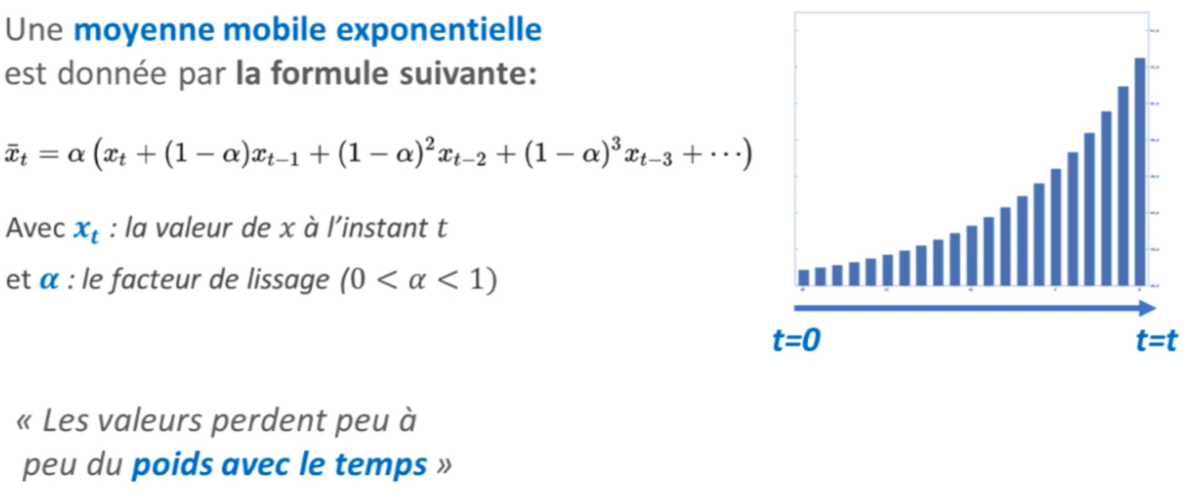
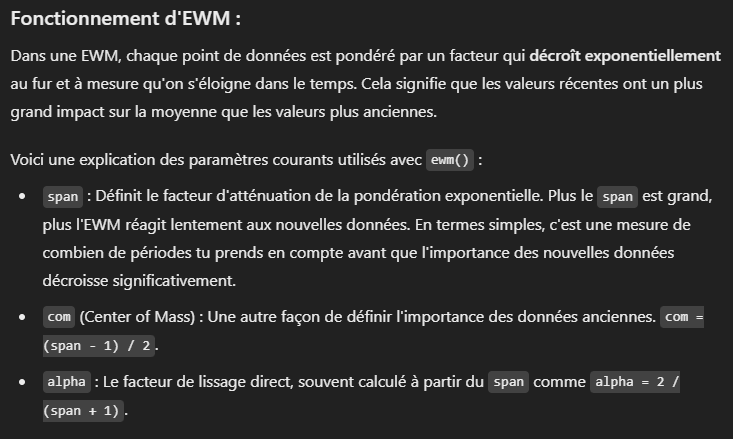

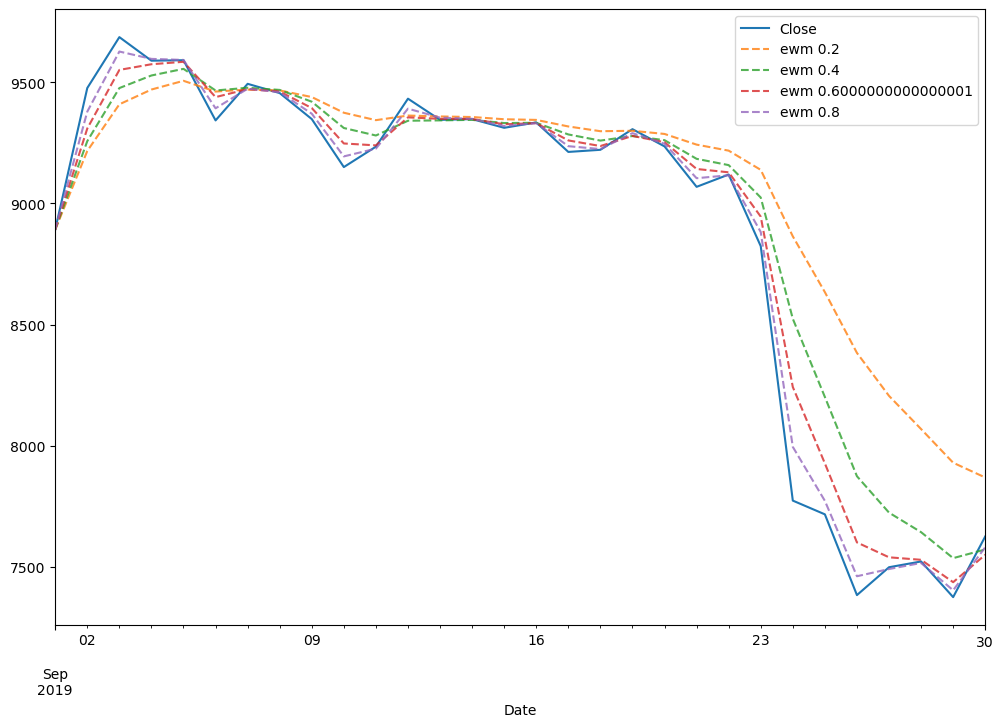

In [35]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
for i in np.arange(0.2, 1, 0.2):
    bitcoin.loc['2019-09', 'Close'].ewm(alpha=i).mean().plot(label=f'ewm {i}', ls='--', alpha=0.8)
plt.legend()
plt.show()

## 5. Comparaison de 2 série temporelles

In [37]:
ethereum = pd.read_csv('data/ETH-EUR.csv', index_col='Date', parse_dates=True)

In [38]:
ethereum.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1.520000e+03
mean,174.678370,182.124624,166.306507,174.796664,174.796664,1.788746e+07
std,205.263977,214.887829,193.823987,205.237791,205.237791,2.919090e+07
min,0.382800,0.417100,0.360000,0.382800,0.382800,4.900000e+02
25%,9.984500,10.287500,9.727000,9.988000,9.988000,5.944275e+05
50%,122.145001,124.924999,118.240002,122.194999,122.194999,8.711594e+06
75%,252.437504,261.064995,243.157505,252.437504,252.437504,2.369809e+07
max,1144.050049,1175.650024,1062.599976,1144.050049,1144.050049,3.439806e+08


In [39]:
ethereum.index

DatetimeIndex(['2015-08-07', '2015-08-08', '2015-08-09', '2015-08-10',
               '2015-08-11', '2015-08-12', '2015-08-13', '2015-08-14',
               '2015-08-15', '2015-08-16',
               ...
               '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28',
               '2019-09-29', '2019-09-30', '2019-10-01', '2019-10-02',
               '2019-10-03', '2019-10-07'],
              dtype='datetime64[ns]', name='Date', length=1520, freq=None)

### assemblage des 2 datas (Merge ou Join)
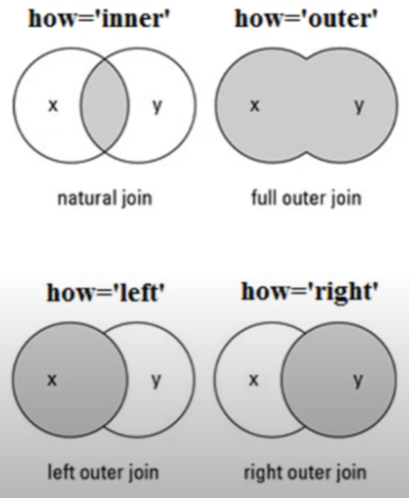

In [41]:
pip show pandas

Name: pandasNote: you may need to restart the kernel to use updated packages.

Version: 2.2.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of

In [85]:
btc_eth = pd.merge(bitcoin, ethereum, on='Date', how='inner', suffixes=('_btc', '_eth')) # voir ce qu'il se passe sans suffixes

# tester how = 'outer', 'left' ou 'right' pour comprendre les différences de la data finale assemblée et faire un choix

In [87]:
btc_eth.head()

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2015-08-07,255.710007,258.880005,253.639999,256.250000,256.250000,1446808,0.593,20.000,0.5930,2.56,2.56,15200
2015-08-08,256.250000,257.029999,239.279999,240.199997,240.199997,1426996,2.560,2.598,0.5616,0.65,0.65,32816
2015-08-09,240.199997,246.110001,239.039993,243.910004,243.910004,797790,0.650,0.800,0.5235,0.70,0.70,4041
2015-08-10,243.910004,248.039993,240.779999,241.679993,241.679993,1135445,0.700,0.750,0.5850,0.68,0.68,5645
2015-08-11,241.679993,247.190002,240.399994,245.759995,245.759995,1472221,0.680,1.008,0.5915,0.95,0.95,21607


In [ ]:
btc_eth.loc['2019', ['Close_btc', 'Close_eth']].plot(figsize=(12, 8)) # sans subplot

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

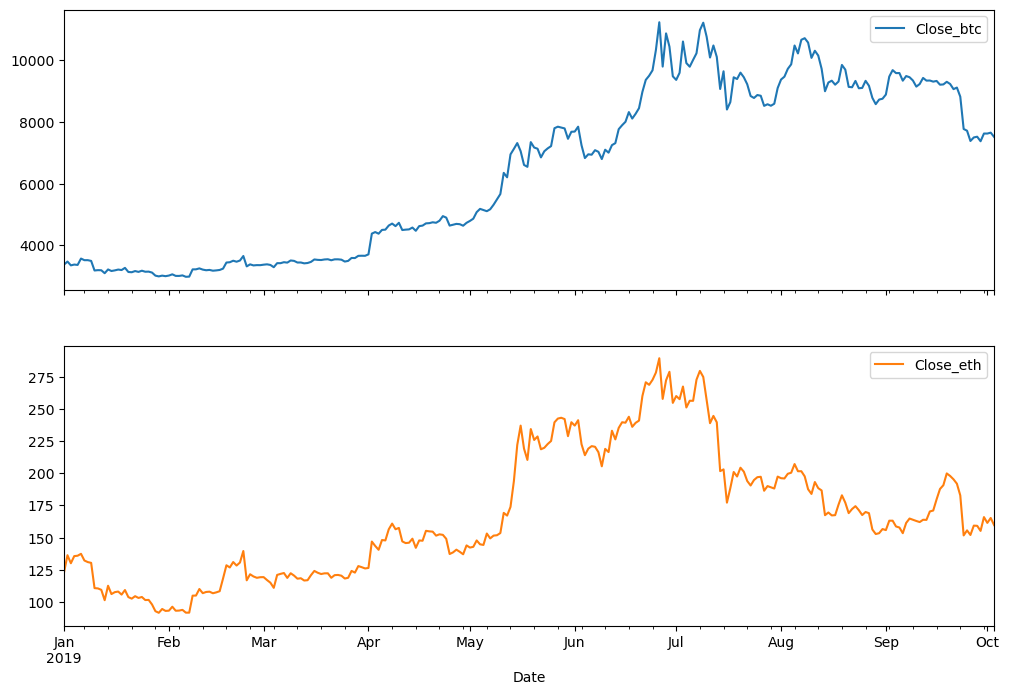

In [91]:
btc_eth.loc['2019', ['Close_btc', 'Close_eth']].plot(subplots=True, figsize=(12, 8)) # sans subplot => pb d'échelle entre les 2 graphs ;-) a tester

### wow il semble que BTC et ETH soient super corrélées

In [46]:
btc_eth.loc['2019', ['Close_btc', 'Close_eth']].corr()

,Close_btc,Close_eth
Close_btc,1.000000,0.813069
Close_eth,0.813069,1.000000
